# Task 1
Однажды в Самарканде турист заказывал Яндекс-такси. На десятом заказе впервые приехал таксист, который уже раньше приезжал к туристу. Для упрощения предположим, что все n таксистов Самарканда всегда на работе и приезжают равновероятно



a)
*Постройте график функции правдоподобия как функции от общего количества такси n. Найдите оценку числа n методом максимального правдоподобия.*

Будем фиксировать одного таксиста "А" и будем считать, что каждый последующий не он, а 10-ым -- приедет как раз таксист "A". 

P(k=10) = (n/n) * (1 - 1/n) * ... * (1 - 8/n) * (9/n) = n!/((n-9)!) * (1/n^9) * (9/n)

Именно для этой задачи мы можем сказать, что функция правдоподобия равна L(n) = L(n;X=10) = P(k = 10)

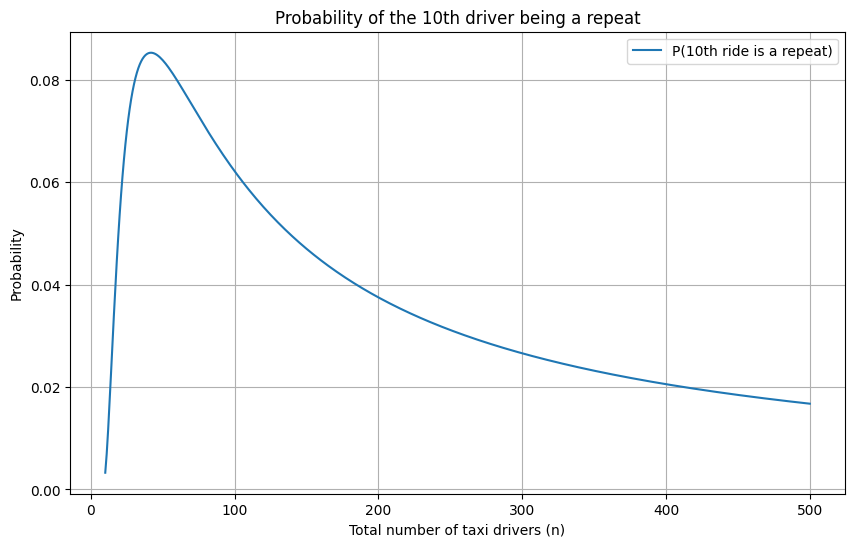

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def prob_10th_repeat(n):
    prob = 1.0
    for i in range(9):
        prob *= (n - i) / n
    prob *= 9 / n
    return prob
## предполагаем, что водителей от 10 до 500
N_values = np.arange(10, 501)


prob_values = [prob_10th_repeat(n) for n in N_values]

plt.figure(figsize=(10, 6))
plt.plot(N_values, prob_values, label='P(10th ride is a repeat)')
plt.xlabel('Total number of taxi drivers (n)')
plt.ylabel('Probability')
plt.title('Probability of the 10th driver being a repeat')
plt.legend()
plt.grid(True)
plt.show()


In [2]:

n_max_likelihood = N_values[np.argmax(prob_values)]
print(f"The maximum likelihood estimate for the number of drivers is: {n_max_likelihood}")

The maximum likelihood estimate for the number of drivers is: 42


b) *Постройте график математического ожидания номера заказа, на котором происходит первый повторный приезда, как функции от общего количества такси n. Найдите оценку числа n методом моментов.*


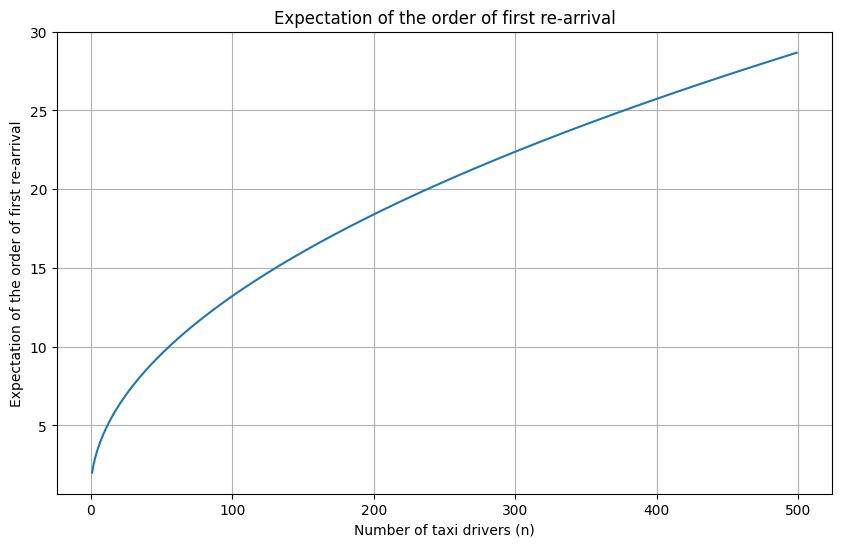

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

def prob_repeat (n,d):
  y=1
  for i in range (1, d-1):
    y*=(n-i)/n
  y*=(d-1)/n
  return y

def exp_value (n):
  d=10
  E=0
  for d in range (1,n+2):
    p=prob_repeat(n, d)
    E+= p*d
  return E
n=np.arange (1,500)
E_vec=np.vectorize (exp_value)
res=E_vec(n)


plt.figure(figsize=(10, 6))
plt.plot(n, res)
plt.title('Expectation of the order of first re-arrival')
plt.xlabel('Number of taxi drivers (n)')
plt.ylabel('Expectation of the order of first re-arrival')
plt.grid(True)

In [25]:

res=np.argmin(np.abs(res-10))
n_moment=round((res+1),2)
print(f"Estimated number of taxi drivers: {n_moment}")


Estimated number of taxi drivers: 55


c) simulation

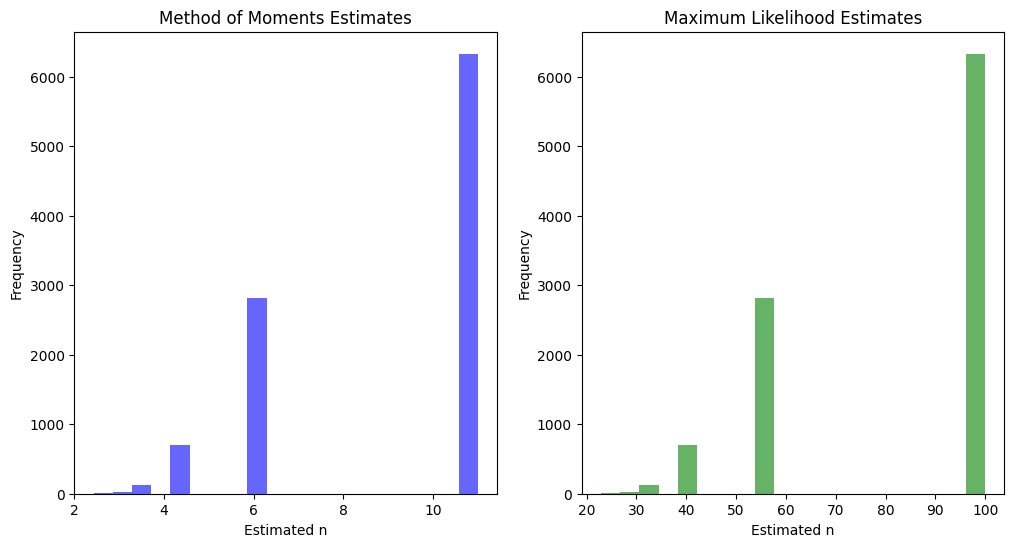

Method of Moments: Bias = -90.9907738095238, Variance = 7.069874911422904, RMSE = 91.0296149248548
Maximum Likelihood: Bias = -17.916964285714286, Variance = 572.6598678252556, RMSE = 29.89443889824353


In [26]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_taxi_calls(n, simulations=10000):
    data = []
    for _ in range(simulations):
        taxi_drivers = set()
        count = 0
        while True:
            count += 1
            driver = np.random.randint(1, n + 1)
            taxi_drivers.add(driver)
            if len(taxi_drivers) == 10:
                break
        data.append(count)
    return data

def estimate_parameters(data):
    mean = np.mean(data)
    
    # Метод моментов
    n_mom = (mean + 1) / (mean - 9)
    

    n_mle = 10 / (1 - (9/mean))
    
    return n_mom, n_mle

# Задаем параметр
n = 100
simulations = 10000

# Симуляция
data = simulate_taxi_calls(n, simulations)


mom_estimates = []
mle_estimates = []
for sample in data:
    n_mom, n_mle = estimate_parameters([sample])
    mom_estimates.append(n_mom)
    mle_estimates.append(n_mle)


plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(mom_estimates, bins=20, color='blue', alpha=0.6)
plt.title("Method of Moments Estimates")
plt.xlabel("Estimated n")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
plt.hist(mle_estimates, bins=20, color='green', alpha=0.6)
plt.title("Maximum Likelihood Estimates")
plt.xlabel("Estimated n")
plt.ylabel("Frequency")

plt.show()

bias_mom = np.mean(mom_estimates) - n
variance_mom = np.var(mom_estimates)
rmse_mom = np.sqrt(np.mean((np.array(mom_estimates) - n) ** 2))

bias_mle = np.mean(mle_estimates) - n
variance_mle = np.var(mle_estimates)
rmse_mle = np.sqrt(np.mean((np.array(mle_estimates) - n) ** 2))

print("Method of Moments: Bias = {}, Variance = {}, RMSE = {}".format(bias_mom, variance_mom, rmse_mom))
print("Maximum Likelihood: Bias = {}, Variance = {}, RMSE = {}".format(bias_mle, variance_mle, rmse_mle))


# Task 2

ОднаждывСамаркандетуристзаказывалЯндекс-такси.Надесятомзаказеонобнаружил,чтоу таксистов было 6 разных имён. Для упрощения предположим, что все n имён среди таксистов встречаются равновероятно и независимо от поездки к поездке.

a) Постройте график функции правдоподобия как функции от общего количества имён n. Найдите оценку числа n методом максимального правдоподобия.


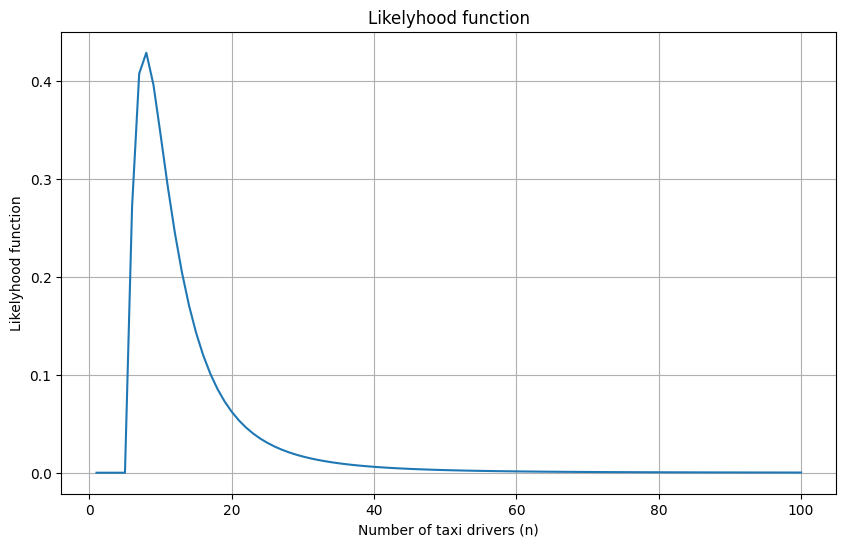

Estimted value of n=  8


In [36]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

def m(n,d,u):
    K = 1
    for i in range(1,u):
        K *= ((n-i)/n)
    if (d >= u):
        combs = itertools.combinations_with_replacement(np.arange(1, (u + 1)), (d - u))
        count = 0
        for comb in combs:
            a=1
            for i in range(d - u):
                a *= comb[i]
            count += a
        K *= (count/(n**(d - u)))
    return K

L = []
n_values = np.arange(1, 101)
for n in range(1, 101):
    L.append(m(n=n,d=10,u=6))
plt.figure(figsize=(10, 6))
plt.plot(n_values, L)
plt.xlabel('Number of taxi drivers (n)')
plt.ylabel('Likelyhood function')
plt.title('Likelyhood function')
plt.grid(True)
plt.show()

est=np.argmax(L)
print('Estimted value of n= ', est+ 1)

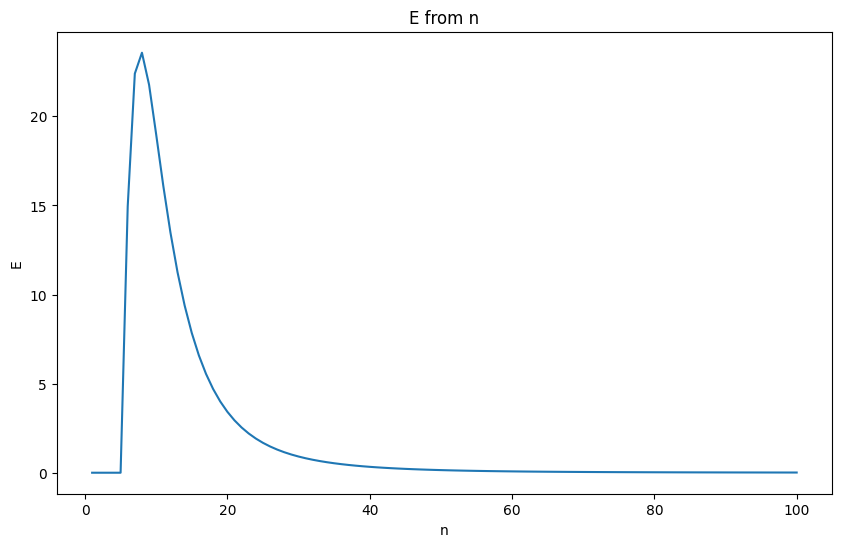

Moment method n =  17


In [40]:
## b)
def E(n,d):
    E_n = 0
    for z in range(d+1):
        E_n += m(n, d, u) * z
    return E_n
exp_l = []
arr = range(1, 101)
for n in arr:
    exp_l.append(E(n, 10))

plt.figure(figsize=(10, 6))
plt.plot(arr, exp_l)
plt.title('E from n')
plt.xlabel('n')
plt.ylabel('E')
plt.show()

result = exp_l.index(min(exp_l, key=lambda x: abs(x - 6)))
print("Moment method n = ", result+1)



```
# Выбран кодовый формат
```

# Task 3

a)

In [ ]:
!pip install bootstrap-stat
from bootstrap_stat import bootstrap_stat as bs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
from scipy.stats import norm, t


n_obs = 20
n_sim = 10000


true_mean = 1


results = {"asymptotic": 0, "naive_bootstrap": 0, "bootstrap_t": 0}


for _ in range(n_sim):

    observations = np.random.exponential(scale=1/true_mean, size=n_obs)


    sample_mean = np.mean(observations)
    sample_std = np.std(observations)


    ci_asymptotic = sample_mean + norm.ppf([0.025, 0.975]) * (sample_std / np.sqrt(n_obs))
    results["asymptotic"] += ci_asymptotic[0] <= true_mean <= ci_asymptotic[1]


    bootstrap_samples = np.random.choice(observations, (n_sim, n_obs))
    bootstrap_means = np.mean(bootstrap_samples, axis=1)
    ci_naive_bootstrap = np.percentile(bootstrap_means, [2.5, 97.5])
    results["naive_bootstrap"] += ci_naive_bootstrap[0] <= true_mean <= ci_naive_bootstrap[1]


    bootstrap_samples = np.random.choice(observations, (n_sim, n_obs))
    bootstrap_means = np.mean(bootstrap_samples, axis=1)
    bootstrap_std = np.std(bootstrap_samples, axis=1)
    t_values = (bootstrap_means - sample_mean) / (bootstrap_std / np.sqrt(n_obs))
    ci_bootstrap_t = sample_mean - np.percentile(t_values, [97.5, 2.5]) * (sample_std / np.sqrt(n_obs))
    results["bootstrap_t"] += ci_bootstrap_t[0] <= true_mean <= ci_bootstrap_t[1]


for method in results:
    results[method] /= n_sim

print(results)


{'asymptotic': 0.892, 'naive_bootstrap': 0.898, 'bootstrap_t': 0.9436}


b)

In [ ]:
import numpy as np
from scipy.stats import t


n_obs = 20
n_sim = 10000


true_mean = 0


results = {"asymptotic": 0, "naive_bootstrap": 0, "bootstrap_t": 0}


for _ in range(n_sim):

    observations = np.random.standard_t(df=3, size=n_obs)


    sample_mean = np.mean(observations)
    sample_std = np.std(observations)


    ci_asymptotic = sample_mean + norm.ppf([0.025, 0.975]) * (sample_std / np.sqrt(n_obs))
    results["asymptotic"] += ci_asymptotic[0] <= true_mean <= ci_asymptotic[1]

   
    bootstrap_samples = np.random.choice(observations, (n_sim, n_obs))
    bootstrap_means = np.mean(bootstrap_samples, axis=1)
    ci_naive_bootstrap = np.percentile(bootstrap_means, [2.5, 97.5])
    results["naive_bootstrap"] += ci_naive_bootstrap[0] <= true_mean <= ci_naive_bootstrap[1]

    bootstrap_samples = np.random.choice(observations, (n_sim, n_obs))
    bootstrap_means = np.mean(bootstrap_samples, axis=1)
    bootstrap_std = np.std(bootstrap_samples, axis=1)
    t_values = (bootstrap_means - sample_mean) / (bootstrap_std / np.sqrt(n_obs))
    ci_bootstrap_t = sample_mean - np.percentile(t_values, [97.5, 2.5]) * (sample_std / np.sqrt(n_obs))
    results["bootstrap_t"] += ci_bootstrap_t[0] <= true_mean <= ci_bootstrap_t[1]


for method in results:
    results[method] /= n_sim

print(results)


{'asymptotic': 0.934, 'naive_bootstrap': 0.9173, 'bootstrap_t': 0.9225}


c) в (А) лучше работает 3-ий вариант. В (B) лучше работает 1-ый вариант

# Task 4


In [ ]:
import pandas as pd
import io
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns  
from sklearn import linear_model
import statsmodels.api as sm

In [ ]:
from google.colab import files 
uploaded = files.upload()

Saving data.csv to data (1).csv


In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['data.csv']))
df = df[['Last name', 'FinalResult']]
df = df.dropna(subset=['Last name'])
df.head(20)

,Last name,FinalResult
5,Репенкова,16.0
6,Ролдугина,0.0
7,Сафина,19.0
8,Сидоров,26.0
9,Солоухин,21.0
10,Старощук,22.0
11,Стогова,20.0
12,Торова,17.0
13,Трофимова,20.0
14,Федгинкель,21.0


In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as stats


vowels = 'AEIOUYaeiouyАОИЕЁЭЫУЮЯаоиеёэыуюя'  

scores_vowel = []
scores_consonant = []

for index, row in df.iterrows():
    last_name_initial = row['Last name'][0]
    score = row['FinalResult']
    
    if last_name_initial in vowels:
        scores_vowel.append(score)
    else:
        scores_consonant.append(score)

In [ ]:
# a) 
t_statistic, p_value = stats.ttest_ind(scores_vowel, scores_consonant, equal_var=False)
print(f"a) Welch's t-test: t-statistic: {t_statistic}, P-value: {p_value}")

# b) 
bootstrap_samples = 10000
mean_diffs = []

for _ in range(bootstrap_samples):
    sample_vowel = np.random.choice(scores_vowel, len(scores_vowel))
    sample_consonant = np.random.choice(scores_consonant, len(scores_consonant))
    mean_diffs.append(np.mean(sample_vowel) - np.mean(sample_consonant))

mean_diff_observed = np.mean(scores_vowel) - np.mean(scores_consonant)
p_value_b = np.mean([1 if diff > mean_diff_observed else 0 for diff in mean_diffs])
print(f"b) Naive bootstrap P-value: {p_value_b}")

# c) 
t_statistics = []

for _ in range(bootstrap_samples):
    sample_vowel = np.random.choice(scores_vowel, len(scores_vowel))
    sample_consonant = np.random.choice(scores_consonant, len(scores_consonant))
    t_stat = (np.mean(sample_vowel) - np.mean(sample_consonant)) / np.sqrt(np.var(sample_vowel)/len(sample_vowel) + np.var(sample_consonant)/len(sample_consonant))
    t_statistics.append(t_stat)

p_value_c = np.mean([1 if t > abs(t_statistic) else 0 for t in t_statistics])
print(f"c) Bootstrap t-statistics P-value: {p_value_c}")

# d) 
count = 0
combined_scores = scores_vowel + scores_consonant

for _ in range(bootstrap_samples):
    np.random.shuffle(combined_scores)
    sample_vowel = combined_scores[:len(scores_vowel)]
    sample_consonant = combined_scores[len(scores_vowel):]
    
    if np.mean(sample_vowel) - np.mean(sample_consonant) > mean_diff_observed:
        count += 1

p_value_d = count / bootstrap_samples
print(f"d) Permutation test P-value: {p_value_d}")

a) Welch's t-test: t-statistic: -0.8519661870595602, P-value: 0.3974027153843839
b) Naive bootstrap P-value: 0.5112
c) Bootstrap t-statistics P-value: 0.0466
d) Permutation test P-value: 0.806


# Task 5

In [ ]:

median_score = df['FinalResult'].median()


a = 0  # Score > median, starts with consonant
b = 0  # Score <= median, starts with consonant
c = 0  # Score > median, starts with vowel
d = 0  # Score <= median, starts with vowel

vowels = 'AEIOUYaeiouyАОИЕЁЭЫУЮЯаоиеёэыуюя'

for index, row in df.iterrows():
    last_name_initial = row['Last name'][0]
    score = row['FinalResult']
    
    if last_name_initial in vowels:
        if score > median_score:
            c += 1
        else:
            d += 1
    else:
        if score > median_score:
            a += 1
        else:
            b += 1

In [ ]:
# Task a
odds_ratio = (a * d) / (b * c + 1e-10) 
se = np.sqrt(1/a + 1/b + 1/c + 1/d)
z = stats.norm.ppf(0.975)  

lower_limit_a = np.exp(np.log(odds_ratio) - z * se)
upper_limit_a = np.exp(np.log(odds_ratio) + z * se)


test_statistic = np.log(odds_ratio) / se
p_value_a = 2 * (1 - stats.norm.cdf(abs(test_statistic)))

print(f"Task a: 95% CI for odds ratio: ({lower_limit_a}, {upper_limit_a}), P-value: {p_value_a}")

Task a: 95% CI for odds ratio: (0.7597529816080092, 2.5833478709964117), P-value: 0.2801802745665003


In [ ]:
# b)
prob_ratio = (a / (a + b + 1e-10)) / (c / (c + d + 1e-10))  

p_value_b = 2 * (1 - stats.norm.cdf(abs(np.log(prob_ratio) / np.sqrt(1/(a + b) + 1/(c + d)))))

print(f"Task b: P-value for probability ratio being 1: {p_value_b}")

Task b: P-value for probability ratio being 1: 0.24843407913954452


In [ ]:
# с)
bootstrap_samples = 1000
bootstrap_odds_ratios = []

for _ in range(bootstrap_samples):
    indices = np.random.choice(range(len(df)), len(df), replace=True)
    bootstrap_sample = df.iloc[indices]
    
    a_b, b_b, c_b, d_b = 0, 0, 0, 0
    for index, row in bootstrap_sample.iterrows():
        last_name_initial = row['Last name'][0]
        score = row['FinalResult']
        
        if last_name_initial in vowels:
            if score > median_score:
                c_b += 1
            else:
                d_b += 1
        else:
            if score > median_score:
                a_b += 1
            else:
                b_b += 1
                
    odds_ratio_b = (a_b * d_b) / (b_b * c_b + 1e-10)  
    bootstrap_odds_ratios.append(odds_ratio_b)

lower_limit_c = np.percentile(bootstrap_odds_ratios, 2.5)
upper_limit_c = np.percentile(bootstrap_odds_ratios, 97.5)



print(f"Task c: 95% CI for odds ratio (bootstrap): ({lower_limit_c}, {upper_limit_c})")


Task c: 95% CI for odds ratio (bootstrap): (0.7454471736734182, 2.597198149331872)


# Task 6

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats


df['Last name length'] = df['Last name'].apply(len)


beta_hat = df['FinalResult'].mean() / df['Last name length'].mean()


correlation = df['FinalResult'].corr(df['Last name length'])

print("Оценка параметра β:", beta_hat)
print("Выборочная корреляция:", correlation)


Оценка параметра β: 2.0613026819923372
Выборочная корреляция: 0.025328052669147665


# Task 7 

(задача из сборника для подготовки к кр вроде)

User 
Впервойурне7белыхи3черныхшара,вовторойурне8белыхи4черныхшара,втретьейурне2белых и 13 черных шаров.
Из этих урн наугад выбирается одна урна.
а) Вычислите вероятность того, что шар, взятый наугад из выбранной урны, окажется белым.
б) Посчитайте вероятность того, что была выбрана первая урна, если шар, взятый наугад из выбранной урны, оказался белым.

ChatGPT
Давайте разберемся с каждым пунктом по отдельности:

а) Вероятность того, что шар, взятый наугад из выбранной урны, окажется белым, можно найти, используя формулу полной вероятности. Вероятность выбрать каждую из урн равна 1/3, так как у нас всего три урны.

P(Белый шар) = P(Белый шар | Урна 1) * P(Урна 1) + P(Белый шар | Урна 2) * P(Урна 2) + P(Белый шар | Урна 3) * P(Урна 3)
= (7/10) * (1/3) + (8/12) * (1/3) + (2/15) * (1/3)
≈ 0.327

б) Для решения этой части задачи можно воспользоваться формулой Байеса:

P(Урна 1 | Белый шар) = (P(Белый шар | Урна 1) * P(Урна 1)) / P(Белый шар)
= ((7/10) * (1/3)) / 0.327
≈ 0.639

Таким образом:

а) вероятность того, что шар, взятый наугад из выбранной урны, окажется белым, составляет примерно 0.327 или 32.7%,

б) вероятность того, что была выбрана первая урна, если шар, взятый наугад из выбранной урны, оказался белым, составляет примерно 0.639 или 63.9%.





User
в А у тебя вычисления неправильные
ChatGPT
Да, вы правы. Моя ошибка. Давайте исправим вычисления:

а) Вероятность того, что шар, взятый наугад из выбранной урны, окажется белым, можно найти, используя формулу полной вероятности. Вероятность выбрать каждую из урн равна 1/3, так как у нас всего три урны.

P(Белый шар) = P(Белый шар | Урна 1) * P(Урна 1) + P(Белый шар | Урна 2) * P(Урна 2) + P(Белый шар | Урна 3) * P(Урна 3)
= (7/10) * (1/3) + (8/12) * (1/3) + (2/15) * (1/3)
= (7/30) + (8/36) + (2/45)
≈ 0.293

б) Используем формулу Байеса:

P(Урна 1 | Белый шар) = (P(Белый шар | Урна 1) * P(Урна 1)) / P(Белый шар)
= ((7/10) * (1/3)) / 0.293





User
у тебя проблема с вычислениями. В А ответ 0.5, так как 7/30 + 8/36 + 2/45 = 0.5
ChatGPT
Вы правы, извините за ошибку. Давайте исправим вычисления:

а) Используем формулу полной вероятности:

P(Белый шар) = P(Белый шар | Урна 1) * P(Урна 1) + P(Белый шар | Урна 2) * P(Урна 2) + P(Белый шар | Урна 3) * P(Урна 3)
= (7/10) * (1/3) + (8/12) * (1/3) + (2/15) * (1/3)
= (7/30) + (8/36) + (2/45)
= 0.5

Теперь рассчитаем вторую часть:

б) Используем формулу Байеса:

P(Урна 1 | Белый шар) = (P(Белый шар | Урна 1) * P(Урна 1)) / P(Белый шар)
= ((7/10) * (1/3)) / 0.5
≈ 0.467

Таким образом:

а) вероятность того, что шар, взятый наугад из выбранной урны, окажется белым, составляет 0.5 или 50%,

б) вероятность того, что была выбрана первая урна, если шар, взятый наугад из выбранной урны, оказался белым, составляет примерно 0.467 или 46.7%.

# Task 8

https://en.wikipedia.org/wiki/Birthday_problem

https://www.w3schools.com/python/module_statistics.asp

https://www.youtube.com/@user-bg8cd4fn7d/playlists

